<a href="https://colab.research.google.com/github/asamiei/HER2/blob/main/Breast_stroma_vs_Epithelium_DAB_stain.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
import glob
import cv2
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import tensorflow as tf
from tensorflow import keras
from keras.models import Sequential
from keras.preprocessing.image import ImageDataGenerator
from keras.layers import BatchNormalization
from keras.layers import Conv2D, MaxPooling2D, Dense, Flatten



In [3]:
from skimage.color import rgb2hed, hed2rgb

def HnE_Hematoxylin(image):
    # Separate the stains from the IHC image
    ihc_hed = rgb2hed(image)

    # Create an RGB image for each of the stains
    null = np.zeros_like(ihc_hed[:, :, 0])
    ihc_h = hed2rgb(np.stack((ihc_hed[:, :, 0], null, null), axis=-1))
    ihc_e = hed2rgb(np.stack((null, ihc_hed[:, :, 1], null), axis=-1))
    ihc_d = hed2rgb(np.stack((null, null, ihc_hed[:, :, 2]), axis=-1))

    return (ihc_h * 255).astype(np.uint8)

In [4]:
image_size = 64

strong (396, 64, 64, 3)
medium (375, 64, 64, 3)
weak (291, 64, 64, 3)
Neg (140, 64, 64, 3)


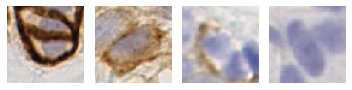

In [22]:

HER2_Strong = glob.glob("/content/drive/MyDrive/Her2_cell_dataset/HER2_Strong/*")

# Combining all the images into one numpy array
HER2_Strong_dataset = [cv2.resize(cv2.imread(fname), (image_size,image_size)) for fname in HER2_Strong]
HER2_Strong_dataset = np.array([cv2.cvtColor(image, cv2.COLOR_BGR2RGB) for image in HER2_Strong_dataset])
# HER2_Strong_dataset = np.array([HnE_Hematoxylin(image) for image in HER2_Strong_dataset])
print('strong', np.shape(HER2_Strong_dataset))


#####################
HER2_Medium = glob.glob("/content/drive/MyDrive/Her2_cell_dataset/Her2_Medium/*")

# Combining all the images into one numpy array
HER2_Medium_dataset = [cv2.resize(cv2.imread(fname), (image_size,image_size)) for fname in HER2_Medium]
HER2_Medium_dataset = np.array([cv2.cvtColor(image, cv2.COLOR_BGR2RGB) for image in HER2_Medium_dataset])
# HER2_Medium_dataset = np.array([HnE_Hematoxylin(image) for image in HER2_Medium_dataset])
print('medium', np.shape(HER2_Medium_dataset))


#####################
HER2_Weak = glob.glob("/content/drive/MyDrive/Her2_cell_dataset/Her2_Weak/*")

# Combining all the images into one numpy array
HER2_Weak_dataset = [cv2.resize(cv2.imread(fname), (image_size,image_size)) for fname in HER2_Weak]
HER2_Weak_dataset = np.array([cv2.cvtColor(image, cv2.COLOR_BGR2RGB) for image in HER2_Weak_dataset])
# HER2_Weak_dataset = np.array([HnE_Hematoxylin(image)for image in HER2_Weak_dataset])
print('weak', np.shape(HER2_Weak_dataset))


#####################
HER2_Neg_Epi = glob.glob("/content/drive/MyDrive/Her2_cell_dataset/Her2_Neg_Epithelium_only/*")

# Combining all the images into one numpy array
HER2_Neg_Epi_dataset = [cv2.resize(cv2.imread(fname), (image_size,image_size)) for fname in HER2_Neg_Epi]
HER2_Neg_Epi_dataset = np.array([cv2.cvtColor(image, cv2.COLOR_BGR2RGB) for image in HER2_Neg_Epi_dataset])
print('Neg', np.shape(HER2_Neg_Epi_dataset))


# Display random images from the dataset
fig, axes = plt.subplots(1, 4, figsize=(5,5), sharex=True, sharey=True)
ax = axes.ravel()

ax[0].imshow(HER2_Strong_dataset[0])
ax[1].imshow(HER2_Medium_dataset[0])
ax[2].imshow(HER2_Weak_dataset[0])
ax[3].imshow(HER2_Neg_Epi_dataset[0])

for a in ax.ravel():
    a.axis('off')

fig.tight_layout()



In [6]:
combined_Epithelium_dataset = np.concatenate((HER2_Weak_dataset, HER2_Medium_dataset, HER2_Strong_dataset), axis = 0)

print(np.shape(combined_Epithelium_dataset))

(1062, 64, 64, 3)


stroma (277, 64, 64, 3)


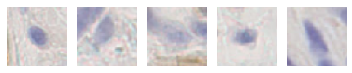

In [21]:
Stroma = glob.glob("/content/drive/MyDrive/Her2_cell_dataset/Stroma_cells/*")

# Combining all the images into one numpy array
Stroma_dataset = [cv2.resize(cv2.imread(fname), (image_size,image_size)) for fname in Stroma]
Stroma_dataset = np.array([cv2.cvtColor(image, cv2.COLOR_BGR2RGB) for image in Stroma_dataset])
# Stroma_dataset = np.array([HnE_Hematoxylin(image) for image in Stroma_dataset])
print('stroma', np.shape(Stroma_dataset))

# Display random images from the dataset
fig, axes = plt.subplots(1, 5, figsize=(5,5), sharex=True, sharey=True)
ax = axes.ravel()

ax[0].imshow(Stroma_dataset[0])
ax[1].imshow(Stroma_dataset[10])
ax[2].imshow(Stroma_dataset[20])
ax[3].imshow(Stroma_dataset[50])
ax[4].imshow(Stroma_dataset[-1])

for a in ax.ravel():
    a.axis('off')

fig.tight_layout()


In [8]:
combined_image_dataset_ = np.concatenate((Stroma_dataset, combined_Epithelium_dataset), axis = 0)


In [9]:
np.shape(combined_image_dataset_)

(1339, 64, 64, 3)

In [10]:
# Assigning a label to each image
    # 0 = stroma
    # 1 = epithelium

Stroma_label = np.zeros(np.size(Stroma_dataset, axis = 0))
epithelium_label = np.ones(np.size(combined_Epithelium_dataset, axis = 0))

combined_label_dataset_ = np.concatenate((Stroma_label, epithelium_label), axis = 0)


In [11]:
np.shape(combined_label_dataset_)

(1339,)

In [12]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(combined_image_dataset_, combined_label_dataset_, test_size=0.2, random_state=42)

In [13]:
from keras.preprocessing.image import ImageDataGenerator

######### Data augmentation

train_datagen = ImageDataGenerator(rotation_range=45,
    zoom_range = 0.15,
    horizontal_flip = True,
    vertical_flip = True,
    height_shift_range = 0.15,
    width_shift_range = 0.15)


train_datagen.fit(X_train)

train_generator = train_datagen.flow(
    X_train,
    y_train,
    batch_size = 32)


Epoch 1/100
16/16 [==============================] - 5s 88ms/step - loss: 0.5986 - accuracy: 0.8202 - val_loss: 6.6011 - val_accuracy: 0.5597
Epoch 2/100
16/16 [==============================] - 1s 46ms/step - loss: 0.3643 - accuracy: 0.8945 - val_loss: 23.0076 - val_accuracy: 0.2201
Epoch 3/100
16/16 [==============================] - 1s 46ms/step - loss: 0.2758 - accuracy: 0.9355 - val_loss: 8.5433 - val_accuracy: 0.4963
Epoch 4/100
16/16 [==============================] - 1s 46ms/step - loss: 0.2483 - accuracy: 0.9512 - val_loss: 6.0914 - val_accuracy: 0.2015
Epoch 5/100
16/16 [==============================] - 1s 47ms/step - loss: 0.1468 - accuracy: 0.9629 - val_loss: 2.1942 - val_accuracy: 0.4888
Epoch 6/100
16/16 [==============================] - 1s 47ms/step - loss: 0.1278 - accuracy: 0.9570 - val_loss: 0.6075 - val_accuracy: 0.7985
Epoch 7/100
16/16 [==============================] - 1s 45ms/step - loss: 0.1438 - accuracy: 0.9677 - val_loss: 1.0622 - val_accuracy: 0.7948
Epoch

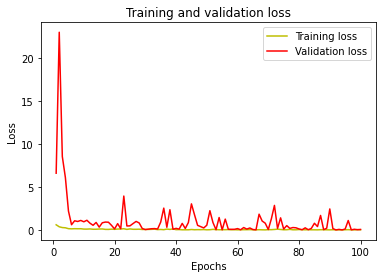

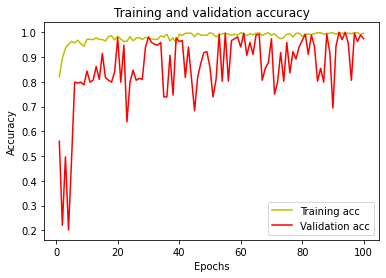

In [14]:
#VGG model with 3 blocks + dropout + batch normalization
activation = 'sigmoid'

model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same', input_shape=(image_size, image_size, 3)))
model.add(BatchNormalization())
model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model.add(BatchNormalization())

model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model.add(BatchNormalization())
model.add(Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model.add(BatchNormalization())
model.add(MaxPooling2D((2, 2)))

model.add(Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model.add(BatchNormalization())

model.add(Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model.add(BatchNormalization())
model.add(MaxPooling2D((2, 2)))

model.add(Flatten())
model.add(Dense(128, activation='relu', kernel_initializer='he_uniform'))
model.add(BatchNormalization())
model.add(Dense(1, activation='sigmoid'))

# compile model

opt = tf.keras.optimizers.Adam(learning_rate=0.001)
model.compile(optimizer=opt, loss='binary_crossentropy', metrics=['accuracy'])


##################################################################

#NOTE: When we use fit_generator, the number of samples processed 
#for each epoch is batch_size * steps_per_epochs. 
#should typically be equal to the number of unique samples in our 
#dataset divided by the batch size.
#For now let us set it to 500 




history = model.fit(
        train_generator,
        steps_per_epoch = 16,
        epochs = 100,
        validation_data = (X_test, y_test),
        shuffle = True
)




#plot the training and validation accuracy and loss at each epoch
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'y', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()


acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
plt.plot(epochs, acc, 'y', label='Training acc')
plt.plot(epochs, val_acc, 'r', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()



[[ 54   0]
 [  0 214]]


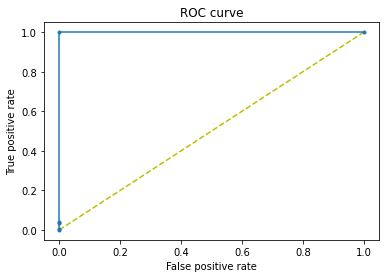

Ideal threshold is:  4    0.131063
Name: thresholds, dtype: float32
Area under curve, AUC =  1.0


In [16]:
##############################
mythreshold = 0.13
##############################


from sklearn.metrics import confusion_matrix
import pandas as pd

y_pred = (model.predict(X_test)>= mythreshold).astype(int)
cm = confusion_matrix(y_test, y_pred)  
print(cm)



#ROC
from sklearn.metrics import roc_curve
y_preds = model.predict(X_test).ravel()

fpr, tpr, thresholds = roc_curve(y_test, y_preds)

plt.figure(1)
plt.plot([0, 1], [0, 1], 'y--')
plt.plot(fpr, tpr, marker='.')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve')
plt.show()



i = np.arange(len(tpr)) 
roc = pd.DataFrame({'tf' : pd.Series(tpr-(1-fpr), index=i), 'thresholds' : pd.Series(thresholds, index=i)})
ideal_roc_thresh = roc.iloc[(roc.tf-0).abs().argsort()[:1]]  #Locate the point where the value is close to 0
print("Ideal threshold is: ", ideal_roc_thresh['thresholds']) 


from sklearn.metrics import auc
auc_value = auc(fpr, tpr)
print("Area under curve, AUC = ", auc_value)